# Assignment 3 - Supervised Learning

## *William Wei-Jung Huang*
Netid:  *wh132*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(A)** 
$P(Y|X) = \prod_{i=1}^N P(y_i=1|x_i)^{y_i} \ P(y_i = 0|x_i)^{1-y_i} = \prod_{i=1}^N \sigma(w^Tx_i)^{y_i}(1-\sigma(w^Tx_i))^{1-y_i}$
<br>**(B)** $C(w)=-ln(\prod_{i=1}^N \sigma(w^Tx_i)^{y_i}(1-\sigma(w^Tx_i))^{1-y_i}) = -\frac{1}{N}\sum_{i=1}^N \ y_i ln(\sigma(w^Tx_i))+(1-y_i)ln(1-\sigma(w^Tx_i))$
<br>**(C)** $\frac{\partial C}{\partial w_2} = -\frac{1}{N}\sum^N_{i=1}(y_i - \sigma(w^Tx_i))x_{i}$
<br>**(D)** $w=w+\eta \triangledown_w C(w) $

In [1]:
#import all packages for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import keras
from keras.datasets import mnist
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from scipy import interp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from math import e


Using TensorFlow backend.


(Part E)


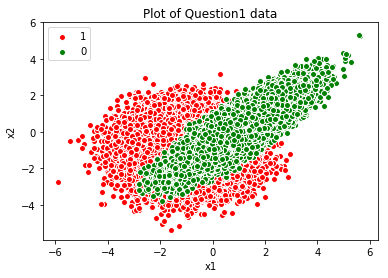

In [2]:
#Part(E)
data=pd.read_csv("./data/A3_Q1_data.csv")
x = data[["x1", "x2"]].values
y = data["y"].values
print("(Part E)")
y1_class = plt.scatter(x[y == 1, 0], x[y == 1, 1], c="r", edgecolors="white",label = "1")
y2_class = plt.scatter(x[y == 0, 0], x[y == 0, 1], c="g", edgecolors="white",label = "0")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of Question1 data")
plt.legend()
plt.show()

It looks like the dataset is not completely linearly separable as there are some overlappings around (0,0). The decision boundary is not linear and logistic regression might not be able to efficiently classify the data.

In [3]:
print("(Part F)")
print("Based on the tables below, there is no missing value in the dataset.")
print("For normalization problem, as the scales across different columns are different, the normalization should be applied.")
print("Number of missing values in the dataset by column")
print("**************************************************")
print(data.isnull().sum())
print("**************************************************")
print(data.describe())
print("**************************************************")

(Part F)
Based on the tables below, there is no missing value in the dataset.
For normalization problem, as the scales across different columns are different, the normalization should be applied.
Number of missing values in the dataset by column
**************************************************
x1    0
x2    0
y     0
dtype: int64
**************************************************
                  x1             x2              y
count  100000.000000  100000.000000  100000.000000
mean        0.048529      -0.397106       0.500000
std         1.452409       1.164015       0.500003
min        -5.886436      -5.352265       0.000000
25%        -1.041007      -1.206343       0.000000
50%         0.039551      -0.401099       0.500000
75%         1.143536       0.402899       1.000000
max         5.634476       5.317718       1.000000
**************************************************


In [4]:
#Part GHI

class logit:
    def __init__(self):
        self.w = None
        self.train_cost = []
        self.test_cost = []
        self.e = None
        self.stopcriteria=1e-06
    def sigmoid(self, z):
        return 1 / (1 + e**(-z))
    
    def gradient(self, x, y):
        y_hat = self.sigmoid(x.dot(self.w))
        return (1/len(y)) * x.T.dot(y_hat - y)
    
    def cost(self, X, Y):
        Y_hat = self.sigmoid(X.dot(self.w))
        cost = - Y.T.dot(np.log(Y_hat)) - (1-Y).T.dot(np.log(1- Y_hat))
        return cost / len(Y)
    
    def fit(self, x_train, y_train, x_test, y_test, lr, epoch=500):
        # initialize weight
        self.w = np.random.rand(x_train.shape[1])
        
        self.e = 0
        while self.e <= epoch:
            current_w = self.w
            # cost
            c_train = self.cost(X=x_train, Y=y_train)
            c_test = self.cost(X=x_test, Y=y_test)
            self.train_cost.append(c_train)
            self.test_cost.append(c_test)
            # training
            y_hat = self.sigmoid(x_train.dot(self.w))
            grad = self.gradient(x_train, y_train)
            self.w = current_w - lr * grad
            
            self.e += 1
            #Stopping critieria
            if self.e!=0 and np.abs(np.linalg.norm(self.w,ord=2)-np.linalg.norm(current_w, ord=2))<self.stopcriteria:
                break
            pass
        pass
    
    def predict(self, x):
        return self.sigmoid(x.dot(self.w))

In [5]:
#normalize data
Q1_scaler=StandardScaler()
data.loc[:,['x1','x2']] = Q1_scaler.fit_transform(data.loc[:,['x1','x2']])
data.describe()

,x1,x2,y
count,1.000000e+05,1.000000e+05,100000.000000
mean,-3.552714e-19,-2.586376e-17,0.500000
std,1.000005e+00,1.000005e+00,0.500003
min,-4.086311e+00,-4.256975e+00,0.000000
25%,-7.501616e-01,-6.952156e-01,0.000000
50%,-6.181174e-03,-3.430496e-03,0.500000
75%,7.539289e-01,6.872842e-01,1.000000
max,3.846008e+00,4.909603e+00,1.000000


In [6]:
# split data
np.random.shuffle(np.arange(len(y)))
x_train=x[:70000]
y_train=y[:70000]
x_test=x[70000:]
y_test=y[70000:]

#adding bias terms
x_train = np.column_stack((np.ones(len(x_train)),x_train))
x_test = np.column_stack((np.ones(len(x_test)),x_test))

In [7]:
logreg = logit()
logreg.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = 0.1)

Part J


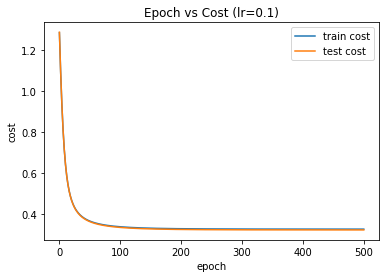

In [8]:
print("Part J")
l_train, = plt.plot(range(logreg.e), logreg.train_cost, label = "train cost")
l_test, = plt.plot(range(logreg.e), logreg.test_cost, label = "test cost")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Epoch vs Cost (lr=0.1)")
plt.legend(handles=[l_train, l_test])
plt.show()

Part K


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


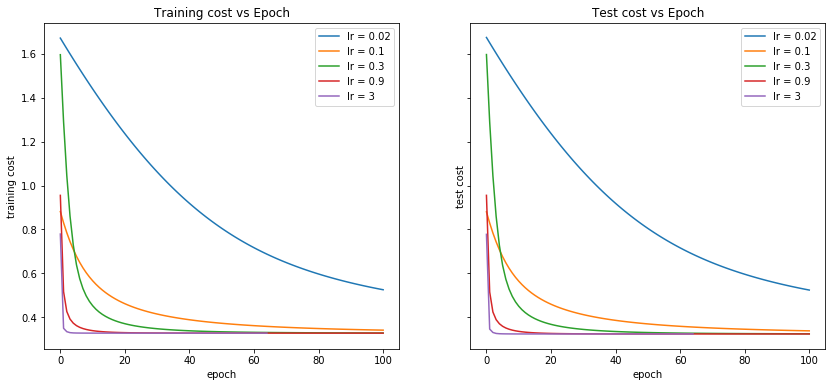

In [9]:
print("Part K")
# (k)
lr_list = [0.02, 0.1, 0.3,0.9,3]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 6))
epoch = 100
for lr in lr_list:
    logreg_lr = logit()
    logreg_lr.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = lr, epoch=epoch)
    
    #print("molde with lr = {} trained ".format(lr))
    
    ax1.plot(range(logreg_lr.e), logreg_lr.train_cost, label = "lr = {}".format(lr))
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("training cost")
    ax1.set_title("Training cost vs Epoch")
    
    ax2.plot(range(logreg_lr.e), logreg_lr.test_cost, label = "lr = {}".format(lr))
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("test cost")
    ax2.set_title("Test cost vs Epoch")
ax1.legend()
ax2.legend()
f.show()

**What is the impact that each parameter has on the process and the results?** 
Learning rate impacts the speed of updating parameters and the cost. If the learning rate is lower(lr=0.02), the cost reduces more slowly.If the learning rate hikes(lr=0.3), the cost decreases quickly. Additionally, once the learning rate is too high(lr=3), the cost decreases exponentially.

**What choices did you make in your chosen approach and why?**
Here I decide to use 5 as the learning rate for the logit model as the test cost function suggests that it reaches to minimum level at the fastest speed.

(Part I)


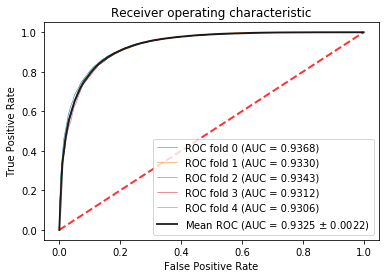

In [10]:
#Part I
print("(Part I)")
skf = StratifiedKFold(n_splits=5)
i = 0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
#plt.figure(figsize=(6, 6))
for train_index, validation_index in skf.split(x_train, y_train):
    x_train_, x_validation = x_train[train_index], x_train[validation_index]
    y_train_, y_validation = y_train[train_index], y_train[validation_index]
    
    logreg_cv = logit()
    logreg_cv.fit(x_train=x_train_, y_train=y_train_, x_test=x_validation, y_test=y_validation, lr = 3)
    
    y_val_hat = logreg_cv.predict(x_validation)
        
    fpr, tpr, _ = metrics.roc_curve(y_validation, y_val_hat)
    roc_auc = metrics.auc(fpr, tpr)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=0.5, alpha=1,
             label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i += 1
    pass
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

**Part (M)**
<br>Cross validation is a technique to prevent the statistical model from overfitting and improve the model's generability.

(Part N)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


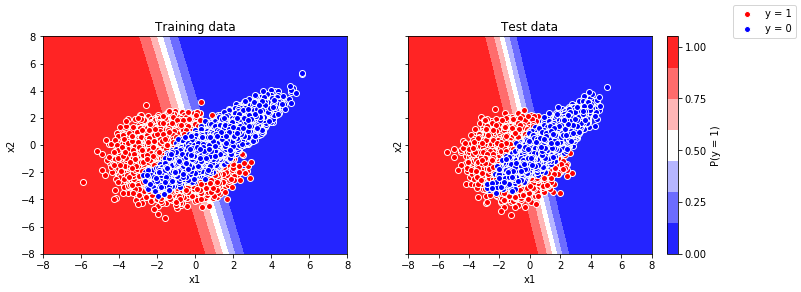

In [15]:
#Part N
print("(Part N)")
x1 = np.linspace(-8, 8, 300)
x2 = np.linspace(-8, 8, 300)

X_mesh = np.column_stack((np.ones(len(x1v.ravel())),
                          x1v.ravel(),
                          x2v.ravel()))
y_hat_mesh = logreg.predict(X_mesh)

x1v, x2v = np.meshgrid(x1, x2)
logreg = logit()
logreg.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = 5)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
ax1.contourf(x1v, x2v, y_hat_mesh.reshape(x1v.shape), cmap="bwr")
ax1.scatter(x = x_train[y_train == 1,1], y = x_train[y_train == 1,2], c='r', edgecolors="white", label = "y = 1")
ax1.scatter(x = x_train[y_train == 0,1], y = x_train[y_train == 0,2], c='b', edgecolors="white", label = "y = 0")
ax1.set_xlim(x1v.min(), x1v.max())
ax1.set_ylim(x2v.min(), x2v.max())
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Training data")

c2 = ax2.contourf(x1v, x2v, y_hat_mesh.reshape(x1v.shape), cmap="bwr")
ax2.scatter(x = x_test[y_test == 1,1], y = x_test[y_test == 1,2], c='r', edgecolors="white")
ax2.scatter(x = x_test[y_test == 0,1], y = x_test[y_test == 0,2], c='b', edgecolors="white")
ax2.set_xlim(x1v.min(), x1v.max())
ax2.set_ylim(x2v.min(), x2v.max())
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Test data")
cb = f.colorbar(c2)
cb.set_label("P(y = 1)")
cb.set_ticks([0, .25, .5, .75, 1])
f.legend()
f.show()

The decision boundry does not separate the data precisely. It could be enhanced through transformations on data, such as quadratic terms. Furthermore, it would produce much more enhancements through changing classification methods.

(Part O)


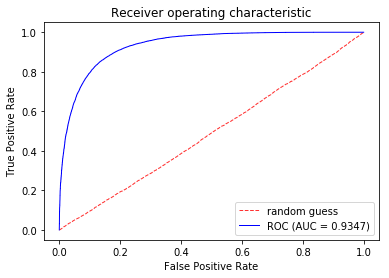

logreg_auc :  0.93
random_auc :  0.49
As we can see, our model outperforms the random guess a lot in terms of AUC.


In [16]:
#(o) Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. 
#What area under the curve (AUC) does your model achieve? 
#How does your model compare in terms of performance?
#Part O
print("(Part O)")

y_rand = np.random.rand(y_test.shape[0],1)
fpr1, tpr1, _  = metrics.roc_curve(y_test,y_rand, pos_label=1)
y_test_hat = logreg.predict(x_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_test_hat)

logreg_auc = metrics.auc(fpr2, tpr2)
random_auc=metrics.auc(fpr1,tpr1)
plt.plot(fpr1, tpr1, lw=1, alpha=.8, color='r',linestyle='--',label='random guess')
plt.plot(fpr2, tpr2, lw=1, alpha=1, color='b',label='ROC (AUC = %0.4f)' % (logreg_auc))

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
print("logreg_auc : ",round(logreg_auc,2))
print("random_auc : ",round(random_auc,2))
print("As we can see, our model outperforms the random guess a lot in terms of AUC.")

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Part (a)
#Convert y to 1(the number is 3) and 0(the number is not 3)
Y_train = []
for i in y_train:
    if i == 3:
        Y_train.append(1)
    else:
        Y_train.append(0)
Y_test = []
for i in y_test:
    if i == 3:
        Y_test.append(1)
    else:
        Y_test.append(0)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

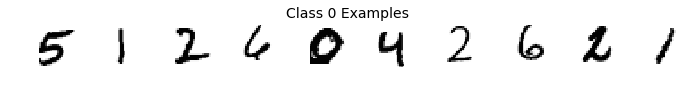

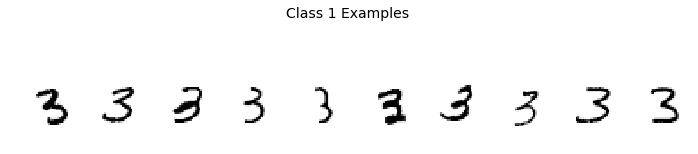

In [5]:
#Part (b)
def mnist_image(idx):
    image_index = idx
    #print(Y_train[image_index])
    plt.imshow(x_train[image_index], cmap='Greys')
    plt.axis('off')

np.random.seed(124)
class_zero = np.random.choice(np.where(Y_train==0)[0],size=10)
class_one = np.random.choice(np.where(Y_train==1)[0],size=10)

plt.figure(figsize=(12, 2))
plt.suptitle("Class 0 Examples", fontsize=14)
for i in range(10):
    plt.subplot(2, 10, i+1)
    mnist_image(class_zero[i])

plt.figure(figsize=(12, 2))
plt.suptitle("Class 1 Examples", fontsize=14)    
for i in range(10):
    plt.subplot(2, 10, i+11)
    mnist_image(class_one[i])

In [6]:
#Part (c)
#How many examples are present in each class? Are the classes balanced? What issues might this cause?
size_0 = np.where(Y_train==0)[0].shape[0]
size_1 = np.where(Y_train==1)[0].shape[0]
print("The number of observations in class 0 is ", str(size_0))
print("The number of observations in class 1 is ", str(size_1))

The number of observations in class 0 is  53869
The number of observations in class 1 is  6131


There is a hugh difference between class0 and class1 in terms of the number of observations. The class is highly imbalanced. If the dataset is highly imbalanced, the algorithm tend to classify new observations to the majority class as the probability of instances belonging to the majority class is significantly high.

In [7]:
#Part (d)
#Convert dimension of X variable as KNN only takes 2-D data
def Convert1D(data):
    x_train=[]
    for i in data:
        x_train.append(i.flatten())
    return np.array(x_train)

x_train1D=Convert1D(x_train)
x_test1D=Convert1D(x_test)

In [20]:
#Train a classifier
logreg=LogisticRegression(solver='lbfgs')
logreg=logreg.fit(x_train1D,Y_train)
logreg_score = logreg.score(x_train1D,Y_train)
print("Accuracy Rate: "+ str(logreg_score))
print(logreg)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy Rate: 0.97565
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/li

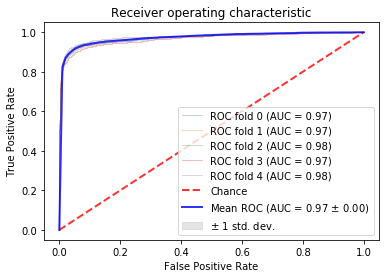

Accuracy of fold 0  :  0.9714190484126323
Accuracy of fold 1  :  0.9735833333333334
Accuracy of fold 2  :  0.972
Accuracy of fold 3  :  0.9700833333333333
Accuracy of fold 4  :  0.9752479373281107


In [23]:
#Cross validation
skf = StratifiedKFold(n_splits=5)
tprs=[]
aucs=[]
accuracy_list=[]
mean_fpr=np.linspace(0,1,100)
i=0
for train_index, test_index in skf.split(x_train1D, Y_train):
    X_train_cv, X_test_cv = x_train1D[train_index], x_train1D[test_index]
    y_train_cv, y_test_cv = Y_train[train_index], Y_train[test_index]
    probas_ = logreg.fit(X_train_cv,y_train_cv).predict_proba(X_test_cv)
    fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    acc = sklearn.metrics.accuracy_score(y_test_cv, logreg.predict(X_test_cv))
    accuracy_list.append(acc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
for i in range(5):
    print("Accuracy of fold",i," : ",accuracy_list[i])

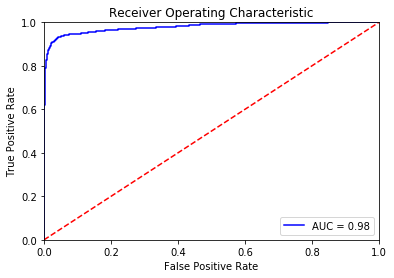

Accuracy rate:  0.9758


In [30]:
Y_pred_proba = logreg.predict_proba(x_test1D)[::,1]
pred_train=logreg.predict(x_test1D)
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_test,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
sklearn.metrics.accuracy_score(Y_test, pred_train)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(sklearn.metrics.accuracy_score(Y_test, logreg.predict(x_test1D))))

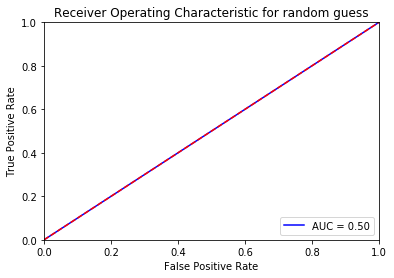

Accuracy:  0.9018


In [35]:
#a classifier that guesses that all examples are NOT 3's
Y_pred_proba = np.array([0]*10000)
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_test,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic for random guess')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
acc = sklearn.metrics.accuracy_score(Y_pred_proba, logreg.predict(x_test1D))
print("Accuracy: ",acc)

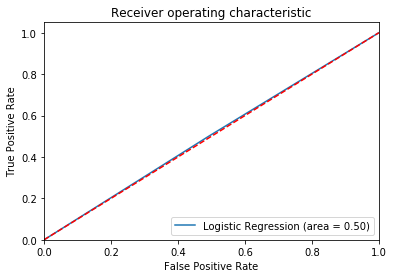

Accuracy:  0.5061


In [38]:
#a classifier that randomly guesses the class
random_label=[]
for i in range(10000):
    random_label.append(random.randint(0,1))
random_label=np.array(random_label)
logit_roc_auc = roc_auc_score(Y_test, random_label)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, random_label)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
acc = sklearn.metrics.accuracy_score(random_label, logreg.predict(x_test1D))
print("Accuracy: ",acc)

**Part (d)**
<br>For the first two ROC plots, the data suggests that the logistic regression classifier is very accurate with accuracies and AUCs all around 0.975. For the classifier that randomly guesses the class, the accuracy and AUC are both around 0.5. For the classifier produces all 0s, the AUC is around 0.5 while the accuracy rises to 0.9. It is because our dataset is extremely imbalanced as most of the data are class 0. Therefore, even the classifer predicts all 0s, the accuracy is still very high. 

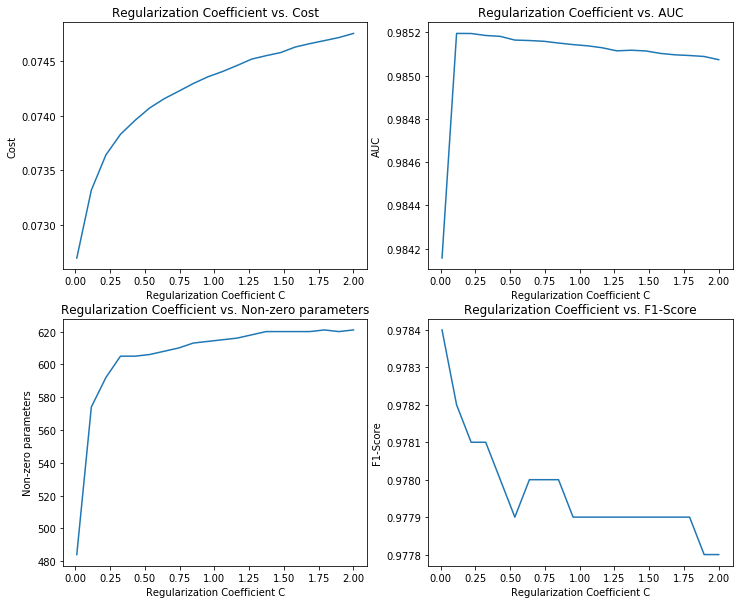

In [290]:
#Part F
x_test = x_test1D; y_test = Y_test
x_train = x_train1D; y_train = Y_train
C = np.linspace(0.01,2,20)
def cost(x,y,y_hat):
    cost = - np.dot(y.T , np.log(y_hat)) - np.dot( (1-y).T ,np.log((1-y_hat)) )
    return cost / x.shape[0]

costs = []; auc = []; f1s = []; nzps = [];
for i in range(len(C)):
    # Actiating 'L1' penalty
    regularizedModel = LogisticRegression(penalty='l1',C=C[i],solver='liblinear',multi_class='auto')
    regularizedModel = regularizedModel.fit(x_train, y_train.ravel()) # ravel just to suppress warnings
    
    y_hat = regularizedModel.predict_proba(x_test)
    y_hat_thresh = regularizedModel.predict(x_test) 
    
    fpr1, tpr1, _  = (metrics.roc_curve(y_test,y_hat[:,1], pos_label=1))
    nzps.append(np.count_nonzero(regularizedModel.coef_))
    costs.append(float(cost(x_test,y_test,y_hat[:,1])))
    auc.append(float(metrics.auc(fpr1,tpr1)))
    f1s.append(metrics.f1_score(y_test, y_hat_thresh,average='micro'))
    pass
parameters = [costs,auc,nzps,f1s]
params_str = ["Cost","AUC", "Non-zero parameters","F1-Score"]

plt.figure(figsize=(12,10))
for i in range(len(parameters)):
    plt.subplot(2,2,(i+1))  
    plt.plot(C,np.array(parameters[i]))
    plt.title("{} vs. {}".format("Regularization Coefficient",params_str[i]))
    plt.xlabel("Regularization Coefficient C")
    plt.ylabel(params_str[i])
plt.show()

1) The number of non-zero parameter also increases as the regularization coefficients increase. It's because when the regularization strength being reduced, coefficients can grow larger. 
<br>
2) The cost becomes larger as the Regularization coefficient increases. Since the cost is the sum of samples and considers weights. Therefore, as (1) mentions, with increasing non-zero weights, the cost definitely rises up.
<br>
3) For F1 score, the higher the F1 score, the better fit the model is, based on its definition. Hence, as the C increases, implying a worse generalization capability, the F1 score on test set should decrease. 
<br>
4) For AUC, as the regularization is very strong at the beginning, the AUC is relatively low. As the regularization strength looses, the AUC improves significantly. However, after a certain point, the model tends to overfit, and AUC starts to decrease.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

#### Part (a)
The dataset is from UCI Machine Learning Repository. The purpose of this modeling task is to predict whether income exceeds 50k/yr based on census data. It's a classification problem as the target variable is binary (whether income exceeds 50k/yr or not). The dataset contains a training set and a test set. 
<br> - The training set contains 32561 observations with 15 columns. 
<br> - The test set contains 16281 observations with 15 columns.

The representation of variables are as below:
 - **age**: the age of an individual
 - **workclass**: a general term to represent the employment status of an individual
 - **fnlwgt**: final weight
 - **education**: the highest level of education achieved by an individual
 - **education_num**: the highest level of education achieved in numerical form
 - **marital_status**: marital status of an individual
 - **occupation**: the general type of occupation of an individual
 - **relationship**: represents what this individual is relative to others
 - **race**: Descriptions of an individual’s race
 - **sex**: the biological sex of the individual
 - **capital_gain**: capital gains for an individual
 - **capital_loss**: capital loss for an individual
 - **hours_per_week**: the hours an individual has reported to work per week
 - **native_country**: country of origin for an individual
 - **class_**: whether or not an individual makes more than $50,000 annually.

##### Loading Data

In [114]:
col_names=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
           'race','sex','capital_gain','capital_loss','hours_per_week','native_country','class_']

train = pd.read_csv("adult.data.txt",sep=',',header=None, names=col_names)
test = pd.read_csv("adult.test.txt",sep=',',skiprows=1,header=None,names=col_names)

##### Data Pre-processing

The dataset contains no missing value. I notice that there are several observations with values of "?" in some categorical variables. After researching the dataset, I am confirmed that the "?" value actually means "unknown" category. For example, if workclass is "?", then occupation is also "?". 

In [115]:
#http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/
train['workclass'] = train.workclass.astype('category')
train['education'] = train.education.astype('category')
train['marital_status'] = train.marital_status.astype('category')
train['occupation'] = train.occupation.astype('category')
train['relationship'] = train.relationship.astype('category')
train['race'] = train.race.astype('category')
train['sex'] = train.sex.astype('category')
train['native_country'] = train.native_country.astype('category')
train['class_'] = train.class_.astype('category')

train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class_'],
      dtype='object')

In [45]:
#Checking for missing values
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class_            0
dtype: int64

In [46]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class_            0
dtype: int64

#### Part (b)
##### Exploratory Data Analysis
Based on the Fig1, Fig2 and Table1, there is no evidence of multicollinearity. Through Fig3, the plots suggest that age, education_num, capital_gain, capital_loss and hours_per_week could be significant predictors. However, the Table2 indicates that the percentage of capital_gain and loss not equals to 0 in the dataset is extremely low. Therefore, it should not be a strong predictor. As for categorical predictors, they could potential be strong indicators based on Fig5-10.
Besides, Although the sizes of two different classes are very different, the Fig4 suggests that the dataset is not highly imbalanced. 

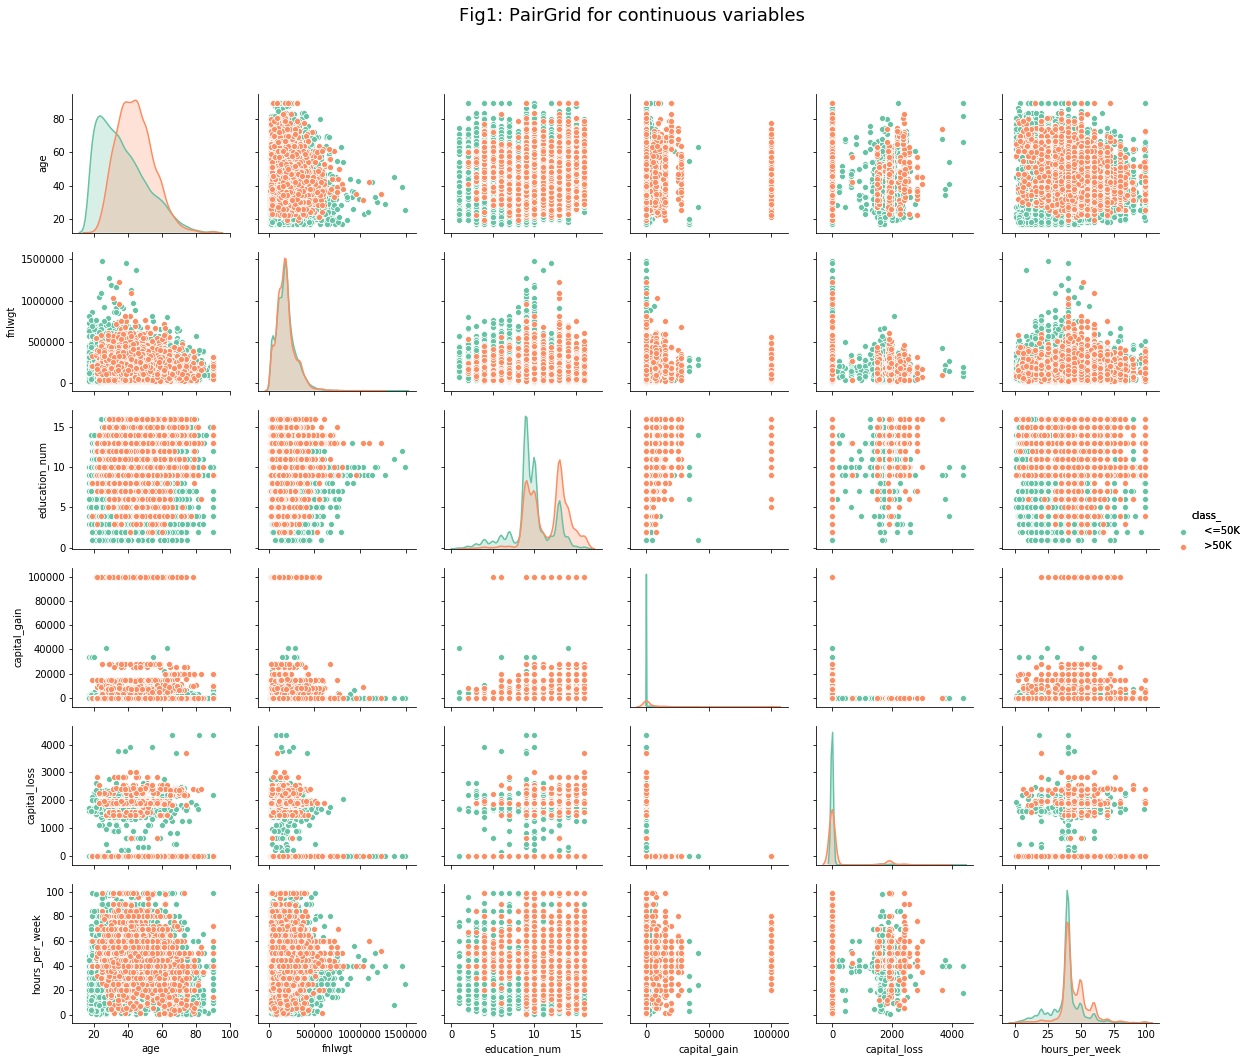

In [199]:
g = sns.pairplot(train, hue="class_", palette="Set2", diag_kind="kde", height=2.5)
g.fig.suptitle("Fig1: PairGrid for continuous variables", size=18)
g.fig.subplots_adjust(top=.9)
g.add_legend()

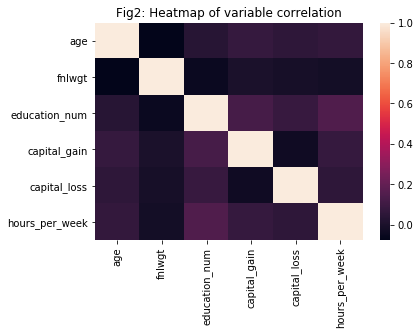

In [200]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title("Fig2: Heatmap of variable correlation")
plt.show()

In [201]:
c=train.corr().abs()
s=c.unstack()
so=s.sort_values(kind="quicksort")
print("Table1: Variable Correlation")
print(so)

Table1: Variable Correlation
capital_gain    fnlwgt            0.000432
fnlwgt          capital_gain      0.000432
capital_loss    fnlwgt            0.010252
fnlwgt          capital_loss      0.010252
hours_per_week  fnlwgt            0.018768
fnlwgt          hours_per_week    0.018768
capital_loss    capital_gain      0.031615
capital_gain    capital_loss      0.031615
age             education_num     0.036527
education_num   age               0.036527
                fnlwgt            0.043195
fnlwgt          education_num     0.043195
capital_loss    hours_per_week    0.054256
hours_per_week  capital_loss      0.054256
capital_loss    age               0.057775
age             capital_loss      0.057775
                hours_per_week    0.068756
hours_per_week  age               0.068756
fnlwgt          age               0.076646
age             fnlwgt            0.076646
capital_gain    age               0.077674
age             capital_gain      0.077674
capital_gain    hours_per

Text(0.5, 1.0, 'class_ vs hours_per_week')

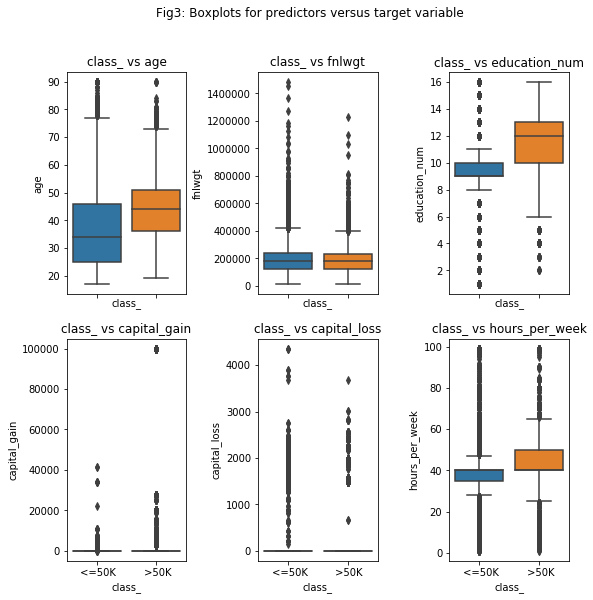

In [205]:
f, axes = plt.subplots(2, 3, figsize=(9, 9), sharex=True)
plt.subplots_adjust(hspace=0.2, wspace=0.6)
plt.suptitle("Fig3: Boxplots for predictors versus target variable")
res,pred='class_','age'
dat=train.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[0,0]).set_title(str(res)+" vs "+str(pred))

res,pred='class_','fnlwgt'
dat=train.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[0,1]).set_title(str(res)+" vs "+str(pred))

res,pred='class_','education_num'
dat=train.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[0,2]).set_title(str(res)+" vs "+str(pred))

res,pred='class_','capital_gain'
dat=train.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[1,0]).set_title(str(res)+" vs "+str(pred))

res,pred='class_','capital_loss'
dat=train.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[1,1]).set_title(str(res)+" vs "+str(pred))

res,pred='class_','hours_per_week'
dat=train.loc[:,[res,pred]]
sns.boxplot(x=dat[res],y=dat[pred],ax=axes[1,2]).set_title(str(res)+" vs "+str(pred))


In [213]:
train.groupby("class_").mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
class_,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [222]:
per_capital_gain=train[train.capital_gain!=0].loc[:,'capital_gain'].count()/train.capital_gain.count()
per_capital_loss=train[train.capital_loss!=0].loc[:,'capital_loss'].count()/train.capital_loss.count()
print("Table2: The percentage of capital_gain and loss in the dataset")
print("The percentage of capital_gain != 0 : ", round(per_capital_gain,2))
print("The percentage of capital_loss != 0 : ", round(per_capital_loss,2))

Table2: The percentage of capital_gain and loss in the dataset
The percentage of capital_gain != 0 :  0.08
The percentage of capital_loss != 0 :  0.05


Text(0.5, 0.98, 'Fig4: Number of observations in different class')

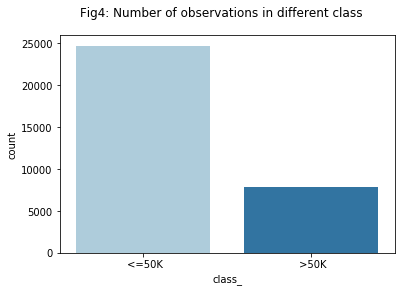

In [211]:
sns.countplot(x='class_',data=train,palette='Paired')
plt.suptitle("Fig4: Number of observations in different class")

Text(0, 0.5, 'Proportion of class by workclass')

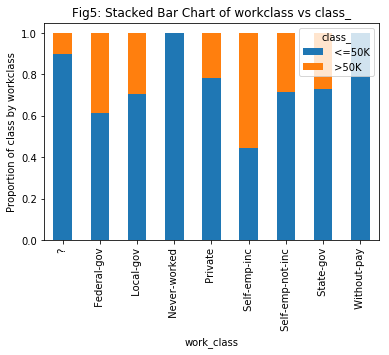

In [231]:
table=pd.crosstab(train.workclass,train.class_)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fig5: Stacked Bar Chart of workclass vs class_')
plt.xlabel('work_class')
plt.ylabel('Proportion of class by workclass')

Text(0, 0.5, 'Proportion of class by workclass')

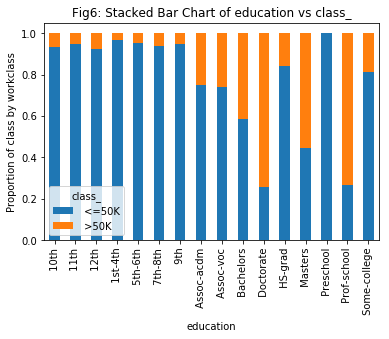

In [232]:
table=pd.crosstab(train.education,train.class_)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fig6: Stacked Bar Chart of education vs class_')
plt.xlabel('education')
plt.ylabel('Proportion of class by workclass')

Text(0, 0.5, 'Proportion of class by marital_status')

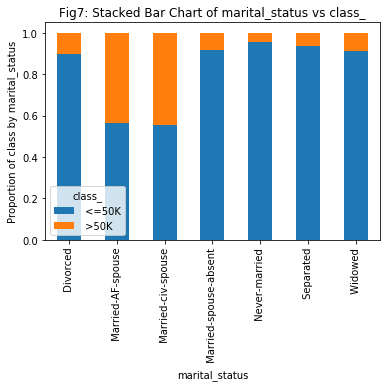

In [234]:
table=pd.crosstab(train.marital_status,train.class_)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fig7: Stacked Bar Chart of marital_status vs class_')
plt.xlabel('marital_status')
plt.ylabel('Proportion of class by marital_status')

Text(0, 0.5, 'Proportion of class by occupation')

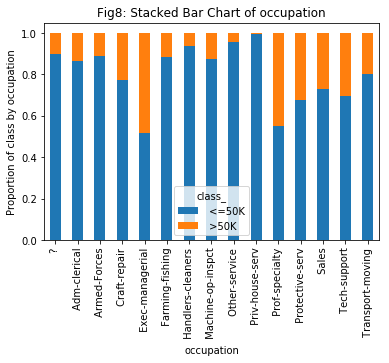

In [235]:
table=pd.crosstab(train.occupation,train.class_)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fig8: Stacked Bar Chart of occupation')
plt.xlabel('occupation')
plt.ylabel('Proportion of class by occupation')

Text(0, 0.5, 'Proportion of class by race')

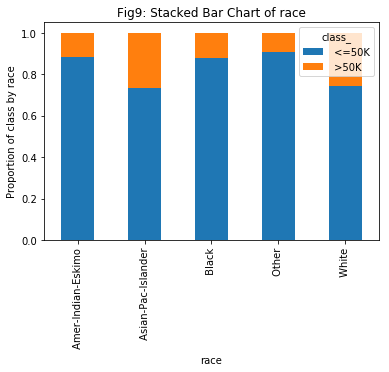

In [341]:
table=pd.crosstab(train.race,train.class_)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fig9: Stacked Bar Chart of race')
plt.xlabel('race')
plt.ylabel('Proportion of class by race')

Text(0, 0.5, 'Proportion of class by native country')

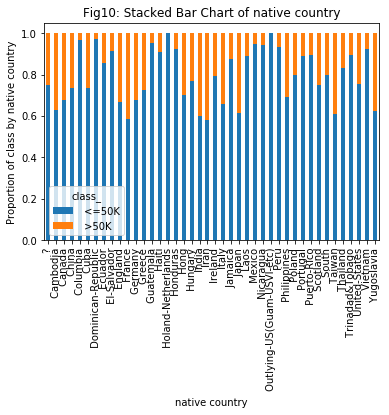

In [238]:
table=pd.crosstab(train.native_country,train.class_)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Fig10: Stacked Bar Chart of native country')
plt.xlabel('native country')
plt.ylabel('Proportion of class by native country')

**Part (c)**  
<br>My target variable is "class_" and the predictors available are listed in part(a). The dataset is clean in part(b) and has no missing values as I discuessed earlier in the data pre-processing section in part(a). For normalization, as the magnitudes of predictors are different (see the table below), the normalization process should be included in the data pre-processing part. 

In [243]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [245]:
#Standardize data - numerical columns
norm_data = train.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']].values
scaler = StandardScaler().fit(norm_data)
rescaledX = scaler.transform(norm_data)
scaled_train = pd.DataFrame(rescaledX,columns=['age','fnlwgt','education_num','capital_gain','capital_loss',
                                               'hours_per_week'])

#Combine numerical and categorical columns
cate_df = train.loc[:,['workclass','education','marital_status','occupation','relationship','race','sex',
                       'native_country']]
cate_df.reset_index(drop=True, inplace=True)
scaled_train.reset_index(drop=True, inplace=True)
train_norm=pd.concat([scaled_train,cate_df],axis=1)
train_norm.describe()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


In [64]:
#Create dummy variables for categorical variables
train_dum = pd.get_dummies(train_norm, prefix='C_', columns=['workclass'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['education'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['marital_status'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['occupation'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['relationship'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['race'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['sex'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['native_country'])

In [247]:
Y_train=train.loc[:,'class_']
Y_train=Y_train.replace(to_replace=' >50K',value=1)
Y_train=Y_train.replace(to_replace=' <=50K',value=0)

X_train=train_dum
X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,C__ ?,C__ Federal-gov,C__ Local-gov,C__ Never-worked,...,C__ Portugal,C__ Puerto-Rico,C__ Scotland,C__ South,C__ Taiwan,C__ Thailand,C__ Trinadad&Tobago,C__ United-States,C__ Vietnam,C__ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Fitting Logistic Regression Model

In [288]:
#Fit a logistic regression model
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg=logreg.fit(X_train,Y_train)
logreg_score = logreg.score(X_train,Y_train)
print("Accuracy Rate: "+ str(logreg_score))
print(logreg)

Accuracy Rate: 0.853075765486318
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


##### Model Evaluation on Training Data

In [329]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_train_pred=logreg.predict(X_train)
confusion_matrix = confusion_matrix(Y_train, Y_train_pred)
print("*******************Confusion Matrix******************")
print(confusion_matrix)
print("****************Classification Report****************")
print(classification_report(Y_train, Y_train_pred))

*******************Confusion Matrix******************
[[23038  1682]
 [ 3102  4739]]
****************Classification Report****************
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     24720
           1       0.74      0.60      0.66      7841

   micro avg       0.85      0.85      0.85     32561
   macro avg       0.81      0.77      0.79     32561
weighted avg       0.85      0.85      0.85     32561



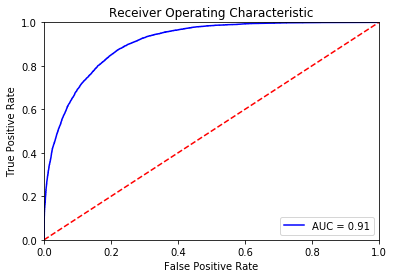

Accuracy rate:  0.853075765486318


In [307]:
Y_pred_proba = logreg.predict_proba(X_train)[::,1]
pred_train=logreg.predict(X_train)
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_train,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(logreg.score(X_train,Y_train)))

##### Model Evaluation with Cross Validation

I conducted 10-fold cross-validation and the results show that the accuracy steadily scatter around 85.20%.

In [312]:
from sklearn.model_selection import cross_val_predict, KFold,cross_val_score
cv = KFold(n_splits=20)
scores = cross_val_score(LogisticRegression(solver='lbfgs',max_iter=1000), 
                         X_train, Y_train, scoring='accuracy', cv=cv)
print("********Accuracy Scores********")
print(scores)
print("Average Score: ", scores.mean())

********Accuracy Scores********
[0.84100675 0.85135135 0.8495086  0.85565111 0.85687961 0.85872236
 0.83599509 0.84766585 0.8507371  0.85565111 0.8544226  0.8507371
 0.85257985 0.85810811 0.86117936 0.85503686 0.86056511 0.84889435
 0.85995086 0.83722359]
Average Score:  0.8520933351734457


##### Test on the Test Set

In [313]:
#Standardize the test set with the scaler from training set
test_std = test.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']].values
rescaled_test_X = scaler.transform(test_std)
scaled_test = pd.DataFrame(rescaled_test_X,
                           columns=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week'])

#Combine numerical and categorical columns
cate_df_test = test.loc[:,['workclass','education','marital_status','occupation','relationship','race','sex',
                       'native_country']]
cate_df_test.reset_index(drop=True, inplace=True)
scaled_test.reset_index(drop=True, inplace=True)
test_std=pd.concat([scaled_test,cate_df_test],axis=1)
test_std.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,-0.995706,0.350774,-1.197459,-0.145920,-0.21666,-0.035429,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,-0.042642,-0.947095,-0.420060,-0.145920,-0.21666,0.774468,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,-0.775768,1.394362,0.746039,-0.145920,-0.21666,-0.035429,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,0.397233,-0.279070,-0.031360,0.895083,-0.21666,-0.035429,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,-1.508894,-0.817458,-0.031360,-0.145920,-0.21666,-0.845327,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [315]:
test_dum = pd.get_dummies(test_std, prefix='C_', columns=['workclass'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['education'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['marital_status'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['occupation'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['relationship'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['race'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['sex'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['native_country'])

In [316]:
Y_test=test.loc[:,'class_']
Y_test=Y_test.replace(to_replace=' >50K.',value=1)
Y_test=Y_test.replace(to_replace=' <=50K.',value=0)
X_test = test_dum

In [317]:
#As there is no observation that has a C__ Holand-Netherlands value, the test set dataframe doesn't have this column,
#Therefore, I should add this column back to the test set to make sure the format is the same as training set
idx=X_train.columns.get_loc("C__ Holand-Netherlands")
X_test.insert(loc=idx, column="C__ Holand-Netherlands", value=0)

In [338]:
pred_test = logreg.predict(X_test)
probs=logreg.predict_proba(X_test)
print("Accuracy Rate: ",sklearn.metrics.accuracy_score(Y_test, pred_test))

Accuracy Rate:  0.8531416989128432


In [340]:
print("*******************Confusion Matrix******************")
print(sklearn.metrics.confusion_matrix(Y_test, pred_test))
print("****************Classification Report****************")
print(sklearn.metrics.classification_report(Y_test, pred_test))

*******************Confusion Matrix******************
[[11584   851]
 [ 1540  2306]]
****************Classification Report****************
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.60      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281



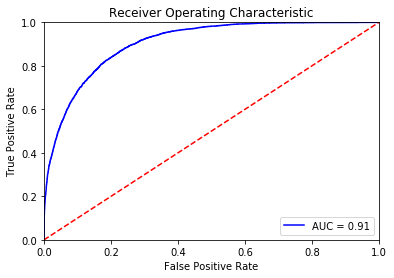

Accuracy rate:  0.8531416989128432


In [339]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
pred_train=logreg.predict(X_test)
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_test,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
sklearn.metrics.accuracy_score(Y_test, pred_train)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(sklearn.metrics.accuracy_score(Y_test, pred_test)))

**(d)**
<br>I applied logistic regression as the target variable is binary. Additionally, I hope to maintain the interpretability of the model, and logstic regression provides simple interpretabilities on explanatory variables. The dataset is also not highly unbalanced, when considering the speed of model fitting, logistic regression could be a great and elegant choice over other classifiers, like random forest and KNN classifier.
<br>
**(e)**
<br>I mainly use ROC to evaluate the results. The AUCs and ROC curves indicate a fairly good result.
<br>
**(f)**
<br>I did not divide the dataset into training and test sets as the dataset comes with both of them. For cross validation, I use K-Fold cross-validation approach with n_splits=20 with a view to prevent from overfitting problem and improve the model's generability.
<br>
**(g)**
<br> see the plots above
<br>
**(h)**
<br> The model performs fairly good as the AUC is around 0.91 on the test set. Although the performance is already pretty good, the prediction could be even more accurate if I make the model more complex, such as adding quadratic term. Moreover, as some of the predictors seem to be not so strong predictors, I could also apply feature selection techniques to drop some not significant predictors.
<br>
**(i)**
<br>
Predicting the income level of citizens is one of the key problems for the government as it helps the government to evaluate the impact on policies in many fields, such as education and immigration. I constructed a logistic regression classifier with an AUC of 0.91, which implies a fairly high predictability. With such as powerful tool, the government can make better decisions based on census data.